In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate,Precision,Recall
import disarray

In [3]:
import torch
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4"

In [4]:
bs = 32
path = Path('/data/s2965003/genre_images_timbre/data/train')
data = ImageDataBunch.from_folder(path, train="/data/s2965003/genre_images_timbre/data/train", valid_pct=0.2, size=256, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['Blues',
 'Country',
 'Electronic',
 'Folk',
 'Jazz',
 'Latin',
 'Metal',
 'New Age',
 'Pop',
 'Punk',
 'Rap',
 'Reggae',
 'RnB',
 'Rock',
 'World']

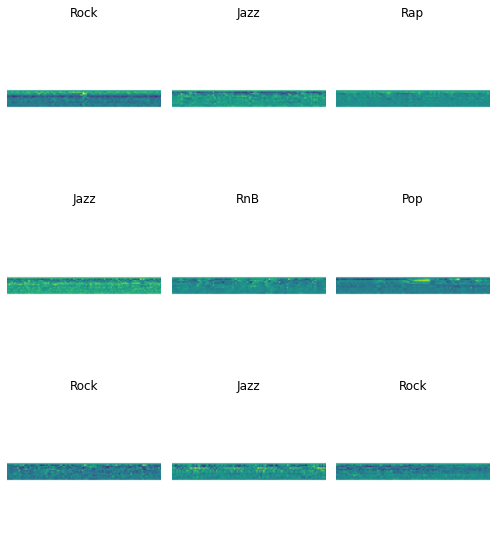

In [6]:
data.show_batch(rows=3, figsize=(7,8))

## With ResNet34

In [7]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate,Precision(),Recall()])

/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [8]:
??create_cnn

In [9]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,3.421606,2.437625,0.649960,0.134833,nan,06:16
1,2.523727,1.899888,0.617343,nan,nan,03:14
2,2.024355,1.840011,0.613365,nan,nan,03:02
3,1.722275,1.770983,0.572792,nan,nan,03:11
4,1.544384,1.757256,0.577566,nan,nan,03:11


/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [10]:
#learn.lr_find()
#learn.recorder.plot()

In [11]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,1.562386,1.824334,0.593477,nan,nan,03:07
1,1.639895,1.828985,0.615752,nan,nan,03:09
2,1.471935,1.835370,0.604614,nan,nan,03:10
3,1.201564,1.802904,0.578361,nan,nan,03:06
4,0.973286,1.801921,0.591090,nan,nan,03:08


In [12]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

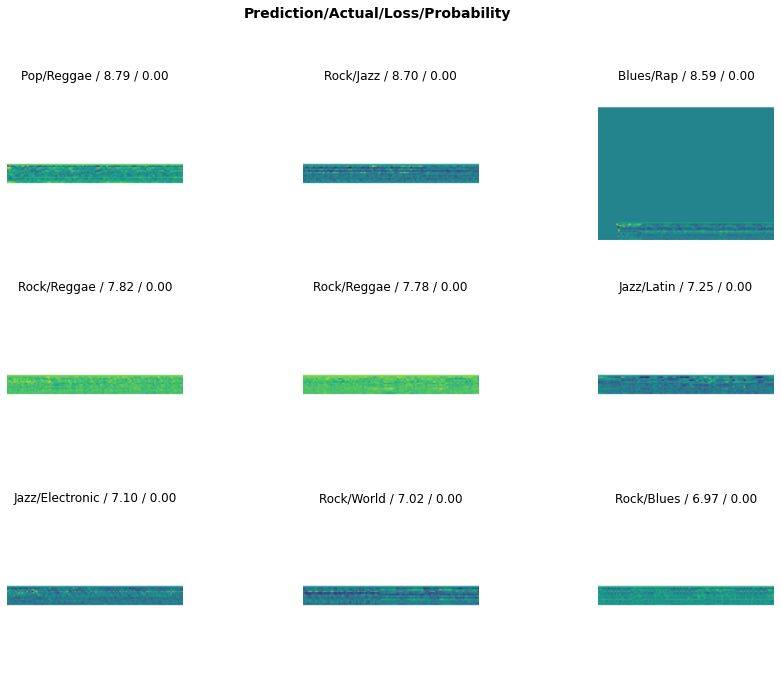

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,micro-average
accuracy,0.897375,0.896579,0.988067,0.966587,0.805091,0.998409,0.964996,1.0,0.878282,0.962609,0.997613,0.974543,0.865553,0.625298,0.996818,0.921188
f1,0.188679,0.155844,NaN,0.125000,0.501018,NaN,0.214286,NaN,0.061350,0.253968,NaN,0.111111,0.235294,0.571429,NaN,0.408910
false_discovery_rate,0.745763,0.818182,1.000000,0.500000,0.532319,NaN,0.600000,NaN,0.897959,0.652174,NaN,0.777778,0.765766,0.520611,NaN,0.591090
false_negative_rate,0.850000,0.863636,1.000000,0.928571,0.460526,1.000000,0.853659,NaN,0.956140,0.800000,1.000000,0.925926,0.763636,0.292793,1.000000,0.591090
false_positive_rate,0.038029,0.046193,0.000805,0.002469,0.136054,0.000000,0.007401,0.0,0.038495,0.012325,0.000000,0.005691,0.074106,0.419434,0.000000,0.042221
negative_predictive_value,0.929048,0.936188,0.988854,0.968825,0.894366,0.998409,0.971820,1.0,0.909768,0.974068,0.997613,0.979968,0.926702,0.784053,0.996818,0.957779
positive_predictive_value,0.254237,0.181818,0.000000,0.500000,0.467681,NaN,0.400000,NaN,0.102041,0.347826,NaN,0.222222,0.234234,0.479389,NaN,0.408910
precision,0.254237,0.181818,0.000000,0.500000,0.467681,NaN,0.400000,NaN,0.102041,0.347826,NaN,0.222222,0.234234,0.479389,NaN,0.408910
recall,0.150000,0.136364,0.000000,0.071429,0.539474,0.000000,0.146341,NaN,0.043860,0.200000,0.000000,0.074074,0.236364,0.707207,0.000000,0.408910
sensitivity,0.150000,0.136364,0.000000,0.071429,0.539474,0.000000,0.146341,NaN,0.043860,0.200000,0.000000,0.074074,0.236364,0.707207,0.000000,0.408910


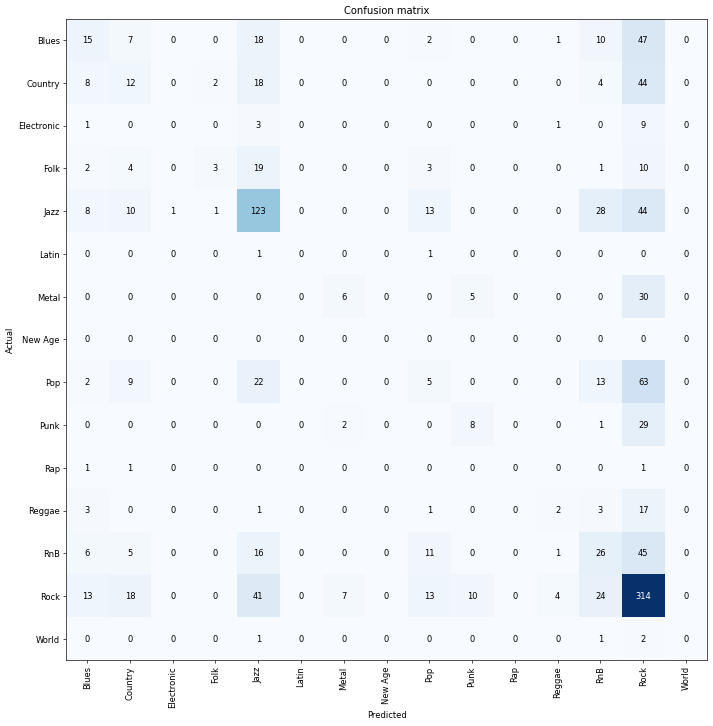

In [14]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm=interp.confusion_matrix()
df = pd.DataFrame(cm)
df.da.export_metrics()

## With ResNet50

In [7]:
learn = create_cnn(data, models.resnet50, metrics=[error_rate,Precision(),Recall()])
#learn.model = torch.nn.DataParallel(learn.model)

/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,3.316407,2.428942,0.661098,0.133878,nan,03:47
1,2.454232,2.082670,0.602228,nan,nan,03:04
2,1.962142,1.874053,0.622116,nan,nan,03:06
3,1.643703,1.851964,0.577566,nan,nan,03:03
4,1.406625,1.835680,0.581543,nan,nan,03:08


/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [9]:
#learn.lr_find()
#learn.recorder.plot()

In [10]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,2.031725,2.379110,0.573588,nan,nan,03:19
1,2.116637,2.416106,0.626094,nan,nan,03:14
2,1.945930,2.624336,0.536197,nan,nan,03:04
3,1.838290,1.678819,0.525060,nan,nan,03:11
4,1.667412,2.030488,0.517900,nan,nan,03:11


In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

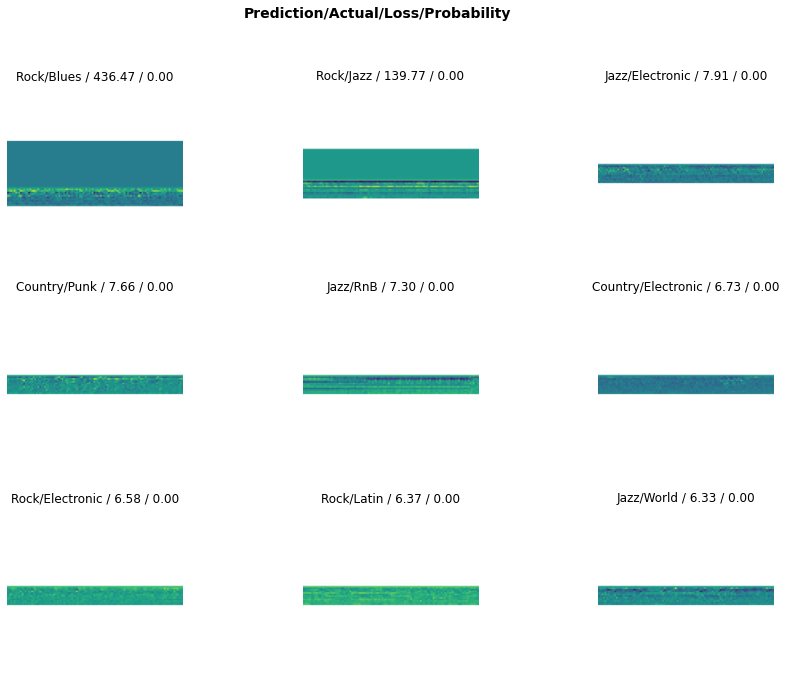

In [12]:
interp.plot_top_losses(9, figsize=(15,11))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,micro-average
accuracy,0.919650,0.887828,0.985680,0.968178,0.848051,0.997613,0.976134,1.0,0.898170,0.964200,0.997613,0.976134,0.867144,0.678600,0.999204,0.930947
f1,0.217054,0.245989,0.100000,0.047619,0.578366,NaN,0.210526,NaN,0.135135,0.081633,NaN,NaN,0.355212,0.649306,NaN,0.482100
false_discovery_rate,0.740741,0.744444,0.800000,0.800000,0.480159,NaN,0.500000,NaN,0.705882,0.500000,NaN,NaN,0.661765,0.440957,NaN,0.517900
false_negative_rate,0.813333,0.762887,0.933333,0.972973,0.348259,1.000000,0.866667,NaN,0.912281,0.955556,1.000000,1.000000,0.626016,0.225673,1.000000,0.517900
false_positive_rate,0.033841,0.057759,0.003221,0.003279,0.114583,0.000000,0.003260,0.0,0.020997,0.001650,0.000000,0.000000,0.079365,0.381137,0.000000,0.036993
negative_predictive_value,0.949293,0.936590,0.988818,0.971246,0.930348,0.997613,0.979183,1.0,0.914963,0.965682,0.997613,0.976134,0.931311,0.814626,0.999204,0.963007
positive_predictive_value,0.259259,0.255556,0.200000,0.200000,0.519841,NaN,0.500000,NaN,0.294118,0.500000,NaN,NaN,0.338235,0.559043,NaN,0.482100
precision,0.259259,0.255556,0.200000,0.200000,0.519841,NaN,0.500000,NaN,0.294118,0.500000,NaN,NaN,0.338235,0.559043,NaN,0.482100
recall,0.186667,0.237113,0.066667,0.027027,0.651741,0.000000,0.133333,NaN,0.087719,0.044444,0.000000,0.000000,0.373984,0.774327,0.000000,0.482100
sensitivity,0.186667,0.237113,0.066667,0.027027,0.651741,0.000000,0.133333,NaN,0.087719,0.044444,0.000000,0.000000,0.373984,0.774327,0.000000,0.482100


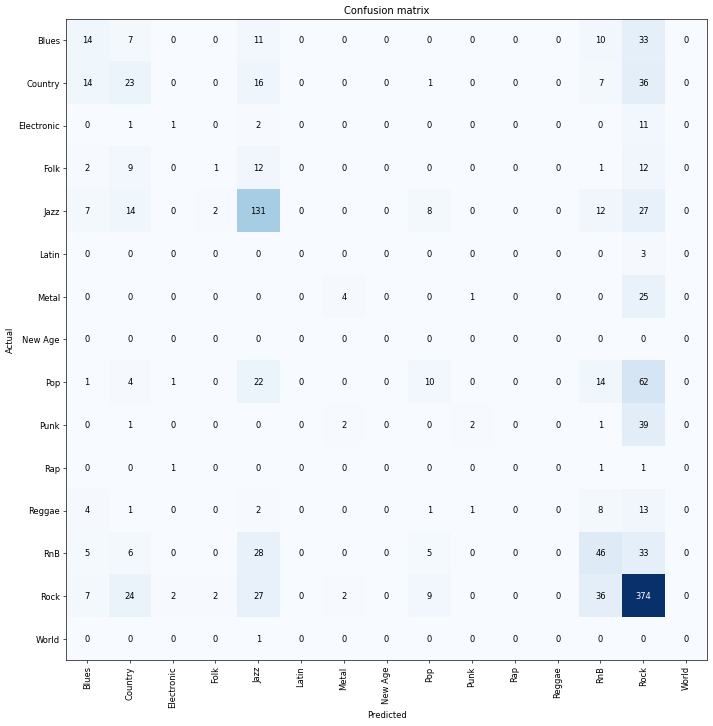

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm=interp.confusion_matrix()
df = pd.DataFrame(cm)
df.da.export_metrics()

## With SqueezeNet

In [14]:
learn = create_cnn(data, models.squeezenet1_0, metrics=[error_rate,Precision(),Recall()])

/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [15]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,3.279823,2.507505,0.652347,0.137409,nan,03:12
1,2.491639,2.263446,0.602228,nan,nan,03:09
2,2.045050,2.013023,0.586317,nan,nan,03:10
3,1.771062,2.060197,0.576770,nan,nan,03:10
4,1.628237,1.995001,0.570406,nan,nan,05:16


/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [16]:
#learn.lr_find()
#learn.recorder.plot()

In [17]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,2.102798,79.724747,0.894988,nan,nan,03:32
1,2.146069,5.127909,0.615752,nan,nan,03:10
2,2.002914,29.711761,0.840095,nan,nan,03:11
3,1.863959,1.954950,0.603023,nan,nan,03:10
4,1.754696,1.668771,0.527446,nan,nan,03:11


In [18]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

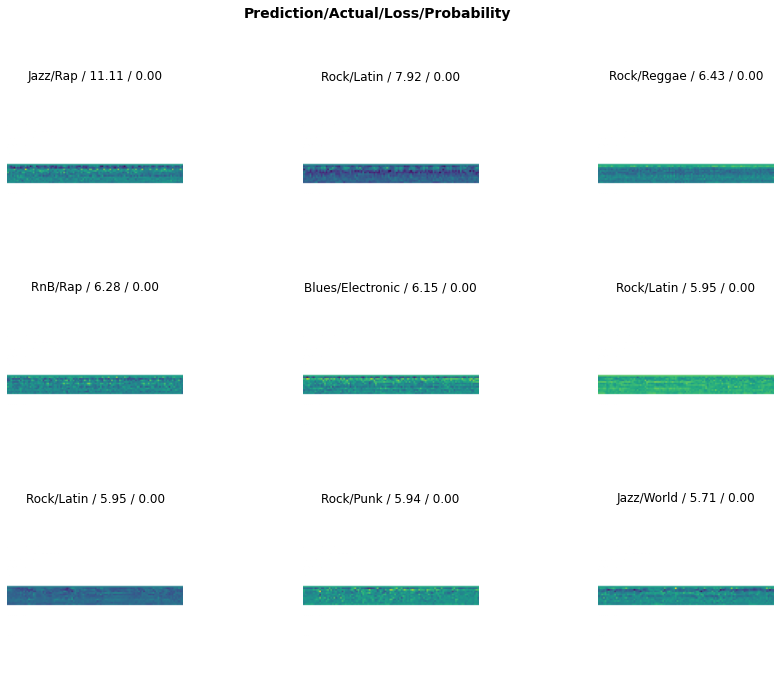

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,micro-average
accuracy,0.940334,0.905330,0.988067,0.970565,0.816229,0.997613,0.976134,1.0,0.909308,0.961018,0.997613,0.976134,0.883850,0.623707,0.999204,0.929674
f1,0.137931,0.105263,NaN,NaN,0.547945,NaN,0.210526,NaN,NaN,0.039216,NaN,NaN,0.223404,0.636992,NaN,0.472554
false_discovery_rate,0.500000,0.805556,NaN,NaN,0.548387,NaN,0.500000,NaN,NaN,0.833333,NaN,NaN,0.676923,0.493902,NaN,0.527446
false_negative_rate,0.920000,0.927835,1.000000,1.000000,0.303483,1.000000,0.866667,NaN,1.000000,0.977778,1.000000,1.000000,0.829268,0.140787,1.000000,0.527446
false_positive_rate,0.005076,0.025000,0.000000,0.000000,0.160985,0.000000,0.003260,0.0,0.000000,0.004125,0.000000,0.000000,0.038801,0.523256,0.000000,0.037675
negative_predictive_value,0.944578,0.926290,0.988067,0.970565,0.935586,0.997613,0.979183,1.0,0.909308,0.964828,0.997613,0.976134,0.914430,0.844394,0.999204,0.962325
positive_predictive_value,0.500000,0.194444,NaN,NaN,0.451613,NaN,0.500000,NaN,NaN,0.166667,NaN,NaN,0.323077,0.506098,NaN,0.472554
precision,0.500000,0.194444,NaN,NaN,0.451613,NaN,0.500000,NaN,NaN,0.166667,NaN,NaN,0.323077,0.506098,NaN,0.472554
recall,0.080000,0.072165,0.000000,0.000000,0.696517,0.000000,0.133333,NaN,0.000000,0.022222,0.000000,0.000000,0.170732,0.859213,0.000000,0.472554
sensitivity,0.080000,0.072165,0.000000,0.000000,0.696517,0.000000,0.133333,NaN,0.000000,0.022222,0.000000,0.000000,0.170732,0.859213,0.000000,0.472554


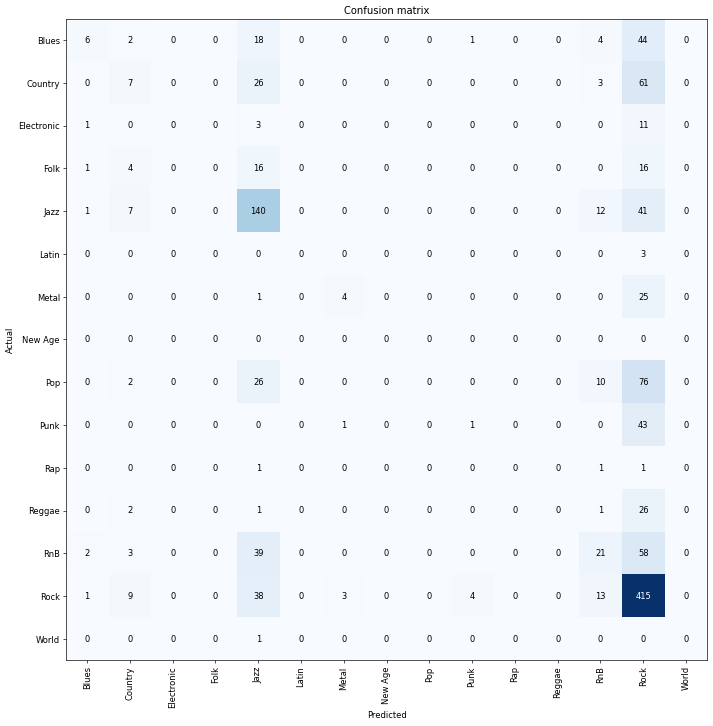

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm=interp.confusion_matrix()
df = pd.DataFrame(cm)
df.da.export_metrics()